In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive # untuk menghubungkan ke dalam drive 
drive.mount('/content/drive')

Mounted at /content/drive


drive/  sample_data/


In [8]:
imagePaths = 'drive/MyDrive/'
label_list = ['Jambu Biji', 'Sirih']
data = []
labels = []

In [11]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'//*.jpeg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [12]:
np.array(data).shape

(100, 32, 32, 3)

In [13]:
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [14]:
print(labels)

['Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji'
 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji'
 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji'
 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji'
 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji'
 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji'
 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji'
 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji'
 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji'
 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Jambu Biji' 'Sirih'
 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih'
 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih'
 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih'
 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih'
 'Sirih' 'Sirih' 'Sirih' 'Sirih' 'Sirih'

In [15]:
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [16]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [17]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (80, 32, 32, 3)
Ukuran data test = (20, 32, 32, 3)


In [18]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 4,197,377
Trainable params: 4,197,377
Non-trainable params: 0
_________________________________________________________________


In [20]:
# tentukan hyperparameter
lr = 0.01
max_epochs = 100
opt_funct = SGD(learning_rate=lr)

In [21]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

In [22]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=30, batch_size=32)

Epoch 1/30
3/3 [==============================] - 1s 117ms/step - loss: 0.7477 - accuracy: 0.4125 - val_loss: 1.0456 - val_accuracy: 0.4000
Epoch 2/30
3/3 [==============================] - 0s 31ms/step - loss: 0.8305 - accuracy: 0.4500 - val_loss: 0.5293 - val_accuracy: 0.8000
Epoch 3/30
3/3 [==============================] - 0s 30ms/step - loss: 0.5038 - accuracy: 0.8250 - val_loss: 0.4468 - val_accuracy: 0.9000
Epoch 4/30
3/3 [==============================] - 0s 32ms/step - loss: 0.4068 - accuracy: 0.9500 - val_loss: 0.4430 - val_accuracy: 0.8500
Epoch 5/30
3/3 [==============================] - 0s 32ms/step - loss: 0.3757 - accuracy: 0.9625 - val_loss: 0.4910 - val_accuracy: 0.7000
Epoch 6/30
3/3 [==============================] - 0s 32ms/step - loss: 0.3835 - accuracy: 0.8750 - val_loss: 0.3766 - val_accuracy: 0.8500
Epoch 7/30
3/3 [==============================] - 0s 30ms/step - loss: 0.3545 - accuracy: 0.8750 - val_loss: 0.3317 - val_accuracy: 0.9500
Epoch 8/30
3/3 [==========

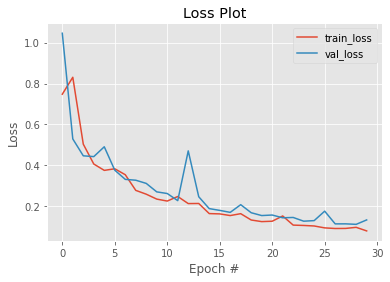

In [26]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

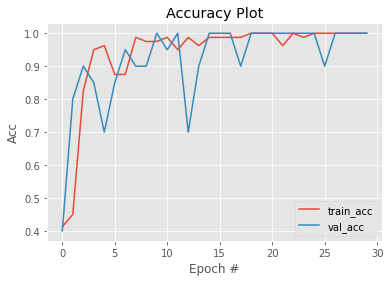

In [28]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 30), H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()